<a href="https://colab.research.google.com/github/renatamontanhana/Algoritmo_Cluster_Hierarquico/blob/main/Cluster_Hier%C3%A1rquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://cienciadosdados.com/images/CINCIA_DOS_DADOS_4.png)

# <font color='PURPLE'>Dicas e Truques de Ciência de Dados</font>

# <font color='GREY'> Como criar Agrupamentos de Clientes</font>

# <font color='BLACK'> Algoritmo "Cluster Hierárquico"</font>
![](https://www.visa.com.br/dam/VCOM/regional/lac/brazil/media-kits/images/800x450px-clusterizacao-entenda-a-importancia-deste-conceito.jpg)



## O que são Clusters?

![](http://www.dataprix.com/files/uploads/2140/segmentacion_clientes.jpg)

#### Clusters são Agrupamentos por algum tipo de Similaridade.

## Quais as principais finalidades nas quais são criados esses clusters?

![](https://marketingpordados.com/wp-content/uploads/2021/08/Clusterizacao-2-1024x580.jpg)

>Segmentar clientes de características semelhantes

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoZX_B2x6PVU3DAGP7-cGWYZxS1UE82Nbr8ddh9VcY6X4ej1PgqjqqtEfbnpxhOZlqdkc&usqp=CAU)

> Otimizar a distribuição de produtos para determinados grupos de clientes

![](https://10empresa.com/wp-content/uploads/2019/08/Estimaci%C3%B3n-del-mercado-objetivo.png)

> Criar categorias que não são tão lógicas mas que fazem sentido estatístico

![](https://static.wixstatic.com/media/ec9f84_e164be382d1e4290b8d1d4b6d51a38b0~mv2.png/v1/fill/w_499,h_600,al_c/ec9f84_e164be382d1e4290b8d1d4b6d51a38b0~mv2.png)

> Criação de Agrupamento para posterior utilização como Target (semi-supervisionado)

![](https://inboundmarketing.com.br/wp-content/uploads/2009/06/DatabasePeopleSorted.png)

# Como utilizar o Algoritmo para criar Clusters

In [1]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#2 Importing the Mall_Customers dataset by pandas
dataset = pd.read_csv('Mall_Customers.csv')


In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
X = dataset.iloc[:, [3,4]].values

In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
#3 Usando o dendrograma para encontrar o número ideal de clusters.
# A primeira coisa que vamos fazer é importar a biblioteca scipy.
# scipy é uma biblioteca Python de código aberto que contém ferramentas para fazer agrupamento hierárquico e construir dendrogramas.
import scipy.cluster.hierarchy as sch

## Dendograma: Representação esquemática ou diagrama

>Use o dendrograma para visualizar como os agrupamentos são formados em cada passo e para avaliar os níveis de similaridade (ou distância) dos agrupamentos que são formados

>Os dendrogramas são frequentemente usados ​​para examinar clusters hierárquicos antes de decidir sobre o número apropriado de clusters para o conjunto de dados.

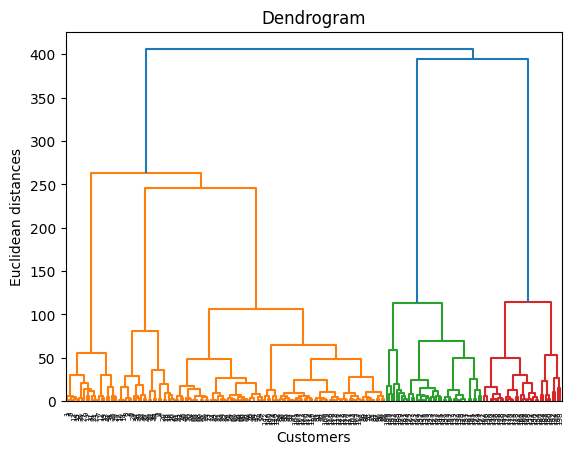

In [8]:
# Vamos criar uma variável dendrograma
# linkage é na verdade o próprio algoritmo de agrupamento hierárquico e então em
# linkage temos que especificar em quais dados aplicamos e engajamos. Este é o conjunto de dados X

# Ward Linkage — Determina a distância entre os clusters usando o método de análise de variância.
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Como descobrimos o melhor número de clusters com base nesse diagrama?

Queremos encontrar a maior distância vertical possível sem cruzar nenhuma linha horizontal, que é a linha com moldura vermelha no diagrama abaixo. Vamos contar as linhas no diagrama e descobrir quantos clusters são melhores

![](https://editor.analyticsvidhya.com/uploads/386331_z9C4IM0kbUe44SNUvT1tPg.png)

In [9]:
#4 Ajustando o clustering hierárquico ao conjunto de dados Mall_Customes
# Existem dois algoritmos para clustering hierárquico: Clustering Hierárquico Aglomerativo e
# Clustering Hierárquico Divisivo. Escolhemos a distância euclidiana e o método ward para nossa
# classe de algoritmo

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

# Vamos tentar ajustar o algoritmo de agrupamento hierárquico ao conjunto de dados X ao criar o
# vetor clusters que informa para cada cliente a qual cluster o cliente pertence.
y_hc=hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [10]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

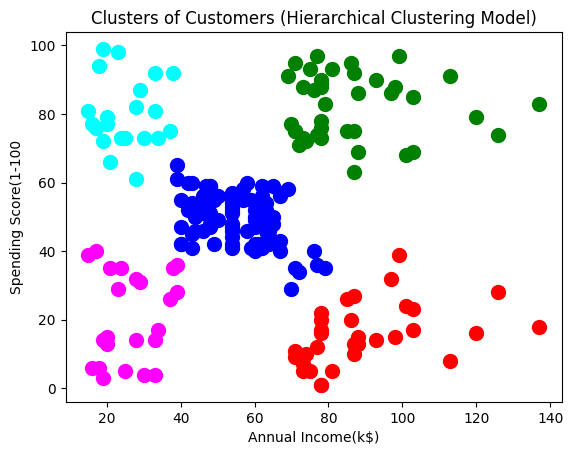

In [11]:
#5 Visualizando os clusters. Este código é semelhante ao código de visualização k-means.
#Nós apenas substituímos o nome do vetor y_kmeans por y_hc para o agrupamento hierárquico

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

## Fim!

![](https://1.bp.blogspot.com/-af_NYssF5Wc/WYF6HZnV7SI/AAAAAAADKRU/x0Iv42Z5hkEvFPmEKM9_IAoAxICi8yazACLcBGAs/s1600/e6xxel3fpbmewadcegua.gif)

## YouTube - Mais Aulas como essa no YouTube
https://www.youtube.com/channel/UCd3ThZLzVDDnKSZMsbK0icg?sub_confirmation=1

![](https://scontent.fbsb30-1.fna.fbcdn.net/v/t1.6435-9/118772415_1151751265207878_5429526722337652519_n.jpg?_nc_cat=109&ccb=1-5&_nc_sid=a26aad&_nc_eui2=AeHQX4qnJ8vqRU1qtbNMun4ZDchPJOE9FxUNyE8k4T0XFai7ykV1IRNSHKmj8OINa-WmpccSewM3mLVqhZQ_F6Oc&_nc_ohc=wR1pipwRrXoAX_Amk7T&_nc_ht=scontent.fbsb30-1.fna&oh=00_AT_9oXauMas7ud88IYsj0bsUZ1dP-7wdiel5VTG6dD88SQ&oe=62395188)

## Links - Ciência dos Dados

<a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/nlxcGjsAk9s" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

**Fonte**:

https://www.analyticsvidhya.com/blog/2021/08/hierarchical-clustering-algorithm-python/